In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression()
from sklearn.externals import joblib

dataset= pd.read_csv("diabetes.csv")
dataset.head()

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


SyntaxError: invalid syntax (<ipython-input-1-b69c99718426>, line 5)

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import plotly
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# command for work offline
plotly.offline.init_notebook_mode(connected=True)

In [16]:
dataset= pd.read_csv("diabetes.csv")
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
print(" Outcome distribution")
print(dataset.groupby('Outcome').size())

 Outcome distribution
Outcome
0    500
1    268
dtype: int64


In [17]:
dataset_copy=dataset.copy(deep=True)
dataset[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=dataset[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
print (dataset.isnull().sum())
dataset.describe()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
dataset["Glucose"].fillna(dataset["Glucose"].mean(),inplace=True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(),inplace=True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].median(),inplace=True)
dataset["Insulin"].fillna(dataset["Insulin"].median(),inplace=True)
dataset["BMI"].fillna(dataset["BMI"].median(),inplace=True)

print (dataset.isnull().sum())
print ('--'*40)
dataset.info()
print ('--'*40)
dataset.head()
dataset.describe()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
----------------------------------------------

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


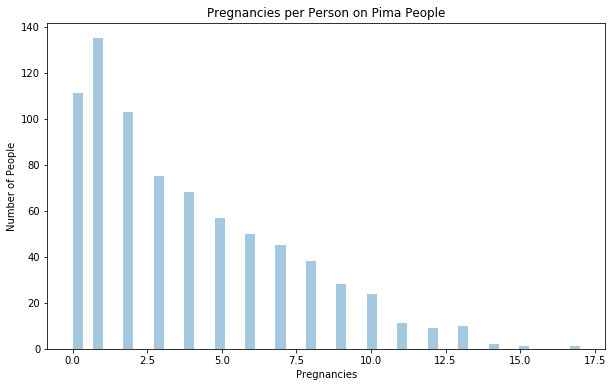

In [21]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(dataset['Pregnancies'],kde=False,bins=50)
plt.title('Pregnancies per Person on Pima People')
plt.ylabel('Number of People')
plt.show()

In [23]:
print('Average amount of children had by a Pima woman: ' + str(dataset['Pregnancies'].mean()))


Average amount of children had by a Pima woman: 3.8450520833333335


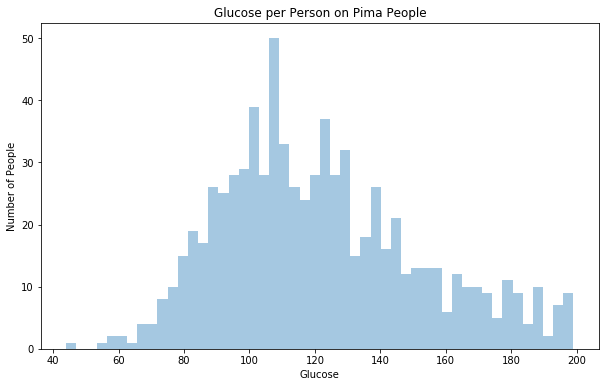

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['Glucose'],kde=False,bins=50)
plt.title('Glucose per Person on Pima People')
plt.ylabel('Number of People')
plt.show()

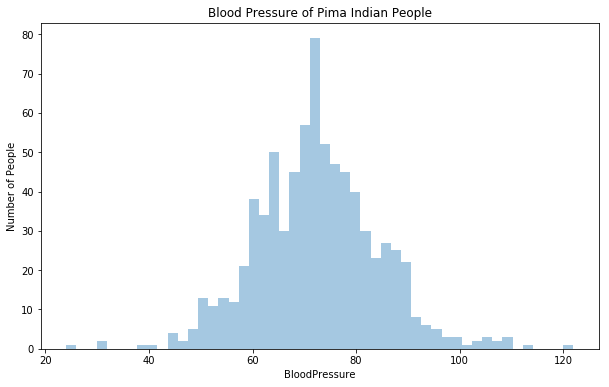

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['BloodPressure'],kde=False,bins=50)
plt.title('Blood Pressure of Pima Indian People')
plt.ylabel('Number of People')
plt.show()

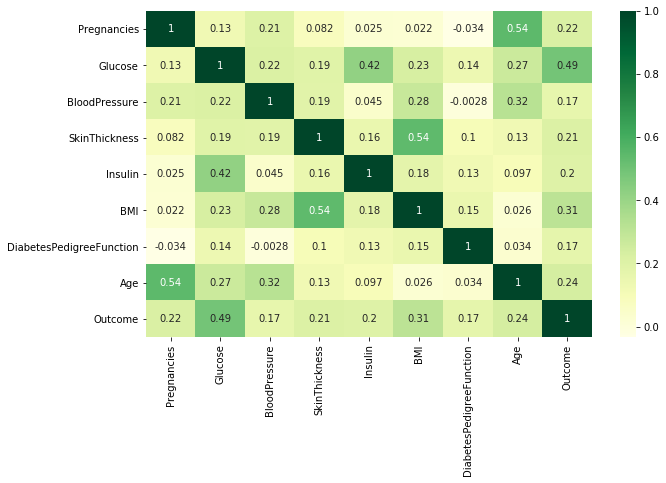

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='YlGn',annot=True)
plt.show()

In [30]:
print('Average Body Mass Index of a Pima woman without diabetes: ' + str(dataset[dataset['Outcome']==0]['BMI'].mean()))
print('Average Body Mass Index of a Pima woman with diabetes: ' + str(dataset[dataset['Outcome']==1]['BMI'].mean()))

Average Body Mass Index of a Pima woman without diabetes: 30.885599999999958
Average Body Mass Index of a Pima woman with diabetes: 35.38358208955219


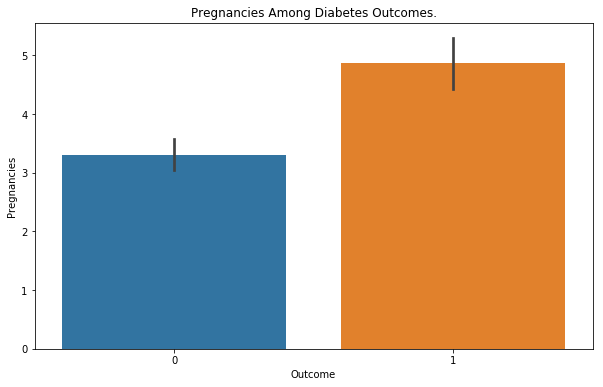

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=dataset,x='Outcome',y='Pregnancies')
plt.title('Pregnancies Among Diabetes Outcomes.')
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
#from imblearn.over_sampling import SMOTE  
#from imblearn.pipeline import Pipeline as Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import (GridSearchCV,StratifiedKFold)

In [35]:
X=dataset.drop(["Outcome"], axis=1)
y=dataset["Outcome"]

In [38]:
scoring = 'roc_auc'
seed=7
models = [] # Here I will append all the algorithms that I will use. Each one will run in all the created datasets.
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('AdaBoost', AdaBoostClassifier()))

print("evaluation metric: " + scoring)    
results=[]
names=[]
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model,X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        
        
        print ("Algorithm :",name)
        print (" Baseline CV mean: ", cv_results.mean())
        print ("--"*30)

evaluation metric: roc_auc
Algorithm : LR
 Baseline CV mean:  0.8273718438027761
------------------------------------------------------------
Algorithm : LDA
 Baseline CV mean:  0.8367641220233007
------------------------------------------------------------
Algorithm : KNN
 Baseline CV mean:  0.7683671235623712
------------------------------------------------------------
Algorithm : CART
 Baseline CV mean:  0.668212699753818
------------------------------------------------------------
Algorithm : NB
 Baseline CV mean:  0.8169220878799963
------------------------------------------------------------
Algorithm : RF
 Baseline CV mean:  0.7913542135209397
------------------------------------------------------------
Algorithm : SVM
 Baseline CV mean:  0.6819594062222089
------------------------------------------------------------
Algorithm : AdaBoost
 Baseline CV mean:  0.8141773547987489
------------------------------------------------------------


In [39]:
train_X,test_X,train_y,test_y = train_test_split (X,y,test_size=0.2,random_state=3)

model1= LogisticRegression()
fit1 =model1.fit(train_X,train_y)
prediction1= model1.predict(test_X)
confusion= metrics.confusion_matrix(test_y, prediction1)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("Baseline model accuracy: ", metrics.accuracy_score(test_y,prediction1))
print ("--"*30)
print ("Baseline matrix confusion: ", "\n",metrics.confusion_matrix(test_y,prediction1))
print ("--"*30)
print ("Baseline sensitivity: ", TP / float(FN + TP))
print ("--"*30)
print ("Baseline model specificity: ", TN / (TN + FP))
print ("--"*30)
print ("Baseline roc auc score: ", "\n", metrics.roc_auc_score(test_y,prediction1))

Baseline model accuracy:  0.6948051948051948
------------------------------------------------------------
Baseline matrix confusion:  
 [[78 14]
 [33 29]]
------------------------------------------------------------
Baseline sensitivity:  0.46774193548387094
------------------------------------------------------------
Baseline model specificity:  0.8478260869565217
------------------------------------------------------------
Baseline roc auc score:  
 0.6577840112201964


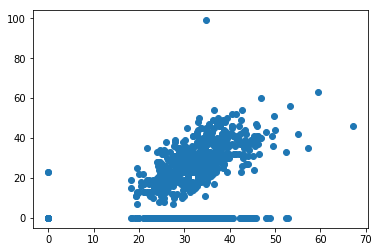

In [9]:
plt.scatter(dataset['BMI'], dataset['SkinThickness'])

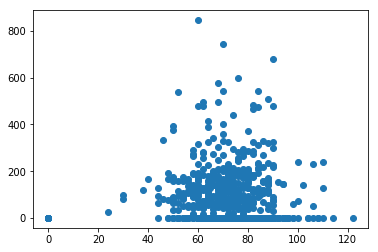

In [12]:
plt.scatter(dataset['BloodPressure'], dataset['Insulin'])